# Import data wrangling and analytics library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


import warnings

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

warnings.simplefilter(action='ignore', category=FutureWarning)




# Data read and Analysis

In [2]:
trainDf = pd.read_csv('train_set.csv')
testDf = pd.read_csv('test_set.csv')
testDF_ind = testDf.copy()

In [3]:
trainDf.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [4]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            5288 non-null   int64  
 1   Vendor_Code       5288 non-null   object 
 2   GL_Code           5288 non-null   object 
 3   Inv_Amt           5288 non-null   float64
 4   Item_Description  5288 non-null   object 
 5   Product_Category  5288 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 248.0+ KB


In [5]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            278 non-null    int64  
 1   Vendor_Code       278 non-null    object 
 2   GL_Code           278 non-null    object 
 3   Inv_Amt           278 non-null    float64
 4   Item_Description  278 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.0+ KB


# Data Cleaning

In [6]:
trainDf.isna().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

In [7]:
testDf.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
dtype: int64

In [8]:
# SetIndex
trainDf.set_index('Inv_Id', inplace=True)
testDf.set_index('Inv_Id', inplace=True)

# Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='Product_Category'>

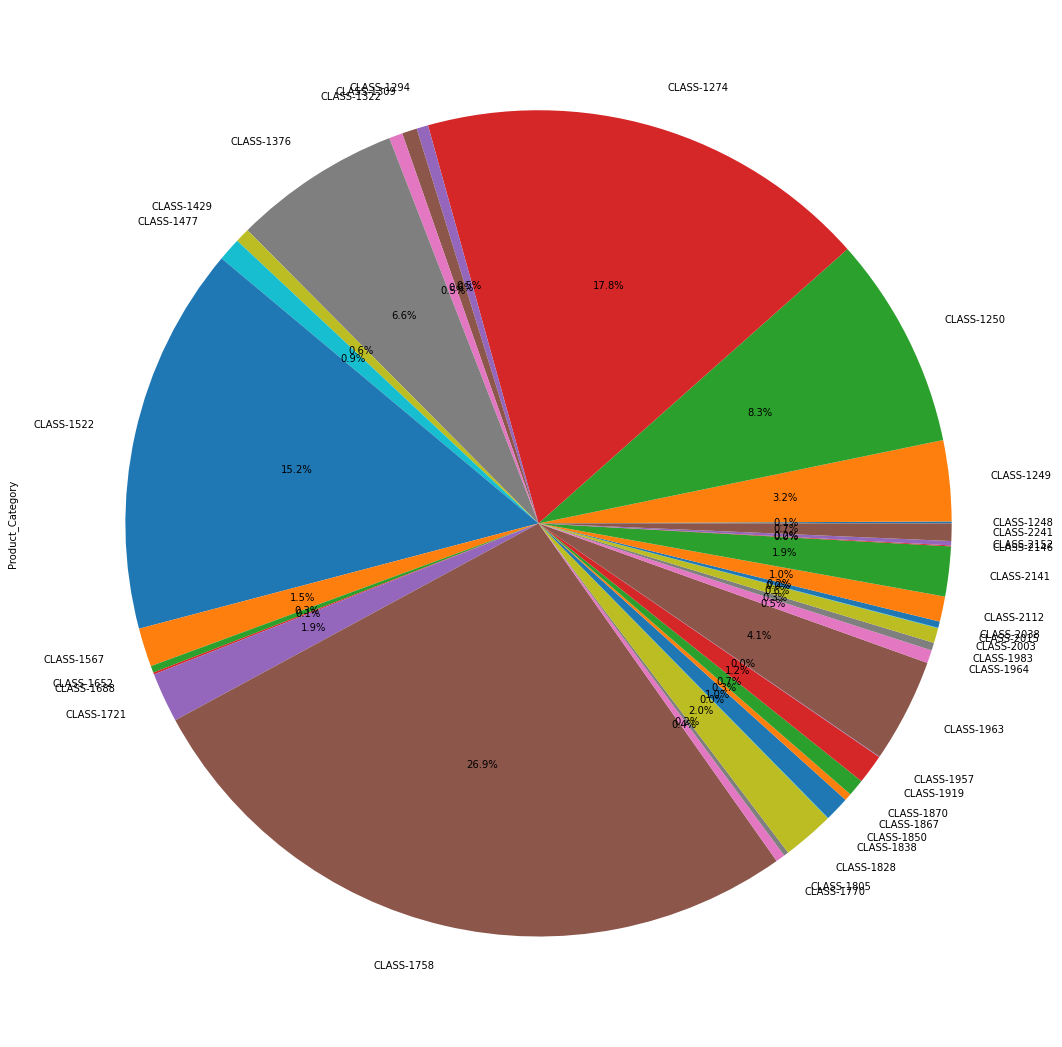

In [9]:
(trainDf.groupby('Product_Category')['Product_Category'].count()).plot.pie(autopct='%1.1f%%',figsize=(26,19))

GL_Code


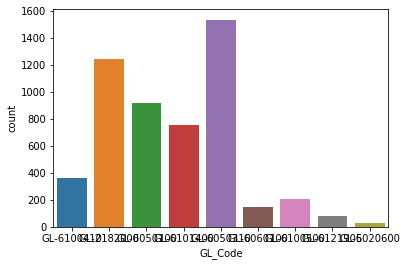

Product_Category


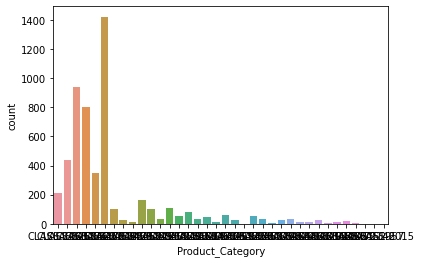

In [10]:
eda_col = ['GL_Code', 'Product_Category']

for col in eda_col:
    print(col)
    sns.countplot(col,data=trainDf,)
    plt.show()

In [11]:
# drop 'Item_Description' and 'Vendor_Code' variable due to high cardinality  
trainDf.drop(['Item_Description', 'Vendor_Code'], axis=1, inplace=True) 
testDf.drop(['Item_Description', 'Vendor_Code'], axis=1, inplace=True) 

# Predictive Modeling

In [12]:
# Extract the input variable and target variable
X = trainDf[['GL_Code', 'Inv_Amt']]
y = trainDf[[ 'Product_Category']]

testDf = testDf[['GL_Code', 'Inv_Amt']]


In [13]:
# dtype transform of Product_Category
le = LabelEncoder()
y = le.fit_transform(y)
y

array([25,  2,  3, ..., 22, 14, 12])

In [14]:
# split original data [i.e X and y] into 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 3701
X_test 1587
y_train 3701
y_test 1587


### dtype transformation

In [15]:
# dtype transform of GL_Code
le = LabelEncoder()
# X.GL_Code = le.fit_transform(X.GL_Code)
le.fit(trainDf.GL_Code)

ct = ColumnTransformer([('GL_Code', OneHotEncoder(), [0])], remainder = 'passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)
testDf = ct.fit_transform(testDf)


# ML model

### Utility functions

In [16]:
def classifier_report(ModelName, model_object):
    model_object.fit(X_train, y_train)
    y_test_pred = model_object.predict(X_test)
    print(ModelName, "Classifier Report:")
    print("\n", metrics.classification_report(y_test, y_test_pred))


In [17]:
#Logistic Regression

lr = LogisticRegression()
classifier_report("Logistic Regression", lr)

Logistic Regression Classifier Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        51
           2       0.35      1.00      0.52       129
           3       0.92      0.95      0.93       295
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00       105
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        15
          10       0.80      1.00      0.89       220
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         1
          14       0.40      0.58      0.47        31
          15       0.90      1.00      0.95       443
          16       0.00      0.00      0

In [18]:
dt = DecisionTreeClassifier()
classifier_report("Decision Tree", dt)

Decision Tree Classifier Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.09      0.08      0.08        51
           2       0.28      0.26      0.27       129
           3       0.97      0.94      0.95       295
           4       0.11      0.12      0.12         8
           5       0.31      0.36      0.33        14
           6       1.00      0.80      0.89        15
           7       0.32      0.30      0.31       105
           8       0.14      0.11      0.12         9
           9       0.12      0.13      0.13        15
          10       0.86      0.90      0.88       220
          11       0.05      0.10      0.06        21
          12       1.00      0.60      0.75         5
          13       0.00      0.00      0.00         1
          14       0.53      0.52      0.52        31
          15       0.94      0.91      0.92       443
          16       0.00      0.00      0.00   

In [19]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 51)
classifier_report("Random Forest", rf)

Random Forest Classifier Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.10      0.08      0.09        51
           2       0.30      0.28      0.29       129
           3       0.97      0.94      0.95       295
           4       0.20      0.12      0.15         8
           5       0.31      0.36      0.33        14
           6       1.00      0.80      0.89        15
           7       0.30      0.30      0.30       105
           8       0.14      0.11      0.12         9
           9       0.11      0.13      0.12        15
          10       0.86      0.90      0.88       220
          11       0.00      0.00      0.00        21
          12       1.00      0.60      0.75         5
          13       0.00      0.00      0.00         1
          14       0.53      0.52      0.52        31
          15       0.93      0.92      0.93       443
          16       0.00      0.00      0.00   

In [20]:
# K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
classifier_report("K-Neighbors", knn)

K-Neighbors Classifier Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.14      0.25      0.18        51
           2       0.32      0.46      0.37       129
           3       0.92      0.96      0.94       295
           4       0.00      0.00      0.00         8
           5       0.27      0.21      0.24        14
           6       1.00      0.20      0.33        15
           7       0.25      0.21      0.23       105
           8       0.33      0.22      0.27         9
           9       0.00      0.00      0.00        15
          10       0.87      0.95      0.90       220
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         1
          14       0.49      0.61      0.54        31
          15       0.93      0.98      0.95       443
          16       0.00      0.00      0.00     

# Model selection

Logistic Regression model performs well compared to other models such as Decision Tree, Random forest and K-Neighbors Classifier. Random forest model has selected for further prediction and analytics.


In [21]:
rf = LogisticRegression(random_state=41)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)

In [22]:
ProductPrediction = pd.Series(rf.predict(testDf), name = "ProductPrediction").astype(int)
ProductPrediction

0       3
1      25
2      15
3      10
4      15
       ..
273    15
274    15
275    25
276     2
277    15
Name: ProductPrediction, Length: 278, dtype: int32

In [23]:
Inv_Id = pd.Series(testDF_ind.index)
results = pd.concat([Inv_Id, ProductPrediction],axis = 1)
results

,0,ProductPrediction
0,0,3
1,1,25
2,2,15
3,3,10
4,4,15
...,...,...
273,273,15
274,274,15
275,275,25
276,276,2


In [24]:
# export into csv format
results.to_csv("ProductPrediction.csv", index = False)

# Conclution: 

The results as per the Accuracy for Logistic Regression is 73%.

The training set should be used to build machine learning models. The test set should be used to see how well the model performs on unseen data.
